# Análise Exploratória

## Introdução

Nesse arquivo serão análisados os dados disponibilizados  pela plataforma edX, incluindo informações das interações dos usuários com os cursos e o resultado final dos mesmos nos cursos¹, os dados são analisados de acordo com os o dicionáro de dado oferecido pelos autores².

O objetivo da análise exploratória é compreender os dados, avaliar critérios de seleção de dados para treinamento, teste e validação de modelos de Machine Learning para Learning Analytics.

Referências:<br/> 
1 - MITx, & HarvardX. (2014). HarvardX-MITx Person-Course Academic Year 2013 De-Identified dataset, version 2.0. Harvard Dataverse. https://doi.org/10.7910/DVN/26147<br/>
2 - MITx, & HarvardX. (2014).Description of data sources and variables for the HarvardX-MITx Person-Course Academic Year 2013 De-identified Dataset.  Dipsonível em: https://dataverse.harvard.edu/file.xhtml?fileId=2468956&version=RELEASED&version=.0, Acessado em 01/05/2018.

## Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#Alterando configurações padrão dos plots
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

## Lendo DataSet
Lendo os dados e aplicando estratégias simples de limpeza dos dados e transformação de tipos.

In [2]:
course_df = pd.read_csv('../data/preprocessed/preprocessed_edx_2014_enriched.csv',low_memory=False)
course_df.head(10)

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,...,course_effort,course_has_certification,course_subject,course_level,course_language,course_transcript_en,course_transcript_pt,course_transcript_es,course_transcript_de,course_transcript_cn
0,CB22x,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,...,6.0,NaN,History,Introductory,English,False,False,False,False,False
1,CS50x,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,...,16.0,True,Computer Science,Introductory,English,True,False,False,False,False
2,CB22x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,6.0,NaN,History,Introductory,English,False,False,False,False,False
3,CS50x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,16.0,True,Computer Science,Introductory,English,True,False,False,False,False
4,ER22x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,6.0,False,Humanities,Introductory,English,True,True,True,True,True
5,PH207x,MHxPC130275857,1,1,1,0,United States,NaN,NaN,NaN,...,10.0,NaN,Health & Safety,Intermediate,English,True,False,False,False,False
6,PH278x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,NaN,NaN,Environmental Studies,Introductory,English,False,False,False,False,False
7,CB22x,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,...,6.0,NaN,History,Introductory,English,False,False,False,False,False
8,CB22x,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,6.0,NaN,History,Introductory,English,False,False,False,False,False
9,CS50x,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,16.0,True,Computer Science,Introductory,English,True,False,False,False,False


In [3]:
summaries_df = pd.read_csv('../data/preprocessed/edx_2014_summaries.csv',low_memory=False)
summaries_df.head(15)

,course_id,course_summary
0,ER22x,HarvardX is proud to relaunch this introductio...
1,CS50x,"This is CS50x, Harvard University's introducti..."
2,PH207x,Quantitative Methods in Clinical and Public He...
3,PH278x,"PH278x explores global environmental changes, ..."
4,14.73x,This course is part of the new MITx MicroMaste...
5,2.01x,2.01x introduces principles of structural anal...
6,3.091x,This first-year University chemistry course ex...
7,6.002x,"Want to learn about circuits and electronics, ..."
8,6.00x,This course is the first of a two-course seque...
9,7.00x,Read fully to understand the verified-certific...


## Análise de Notas Finais
Avaliação das notas finais (grade) dos estudantes matriculados em cada curso.

**Descrição Nota (*Grade*):** administrative,	final	grade	in	the	course,	ranges	from	0	to	1. Example:	“0.87”

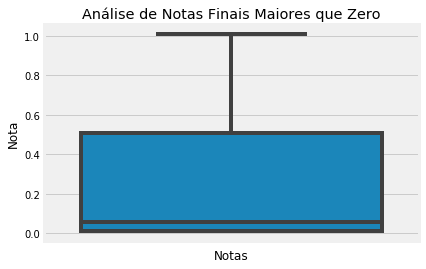

In [4]:

selection = course_df[course_df['grade'] > 0]
sns.boxplot(data=selection, y='grade')

#Definindo título
plt.title('Análise de Notas Finais Maiores que Zero')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Notas')
plt.ylabel('Nota')
#Exibindo gráfico
plt.show()

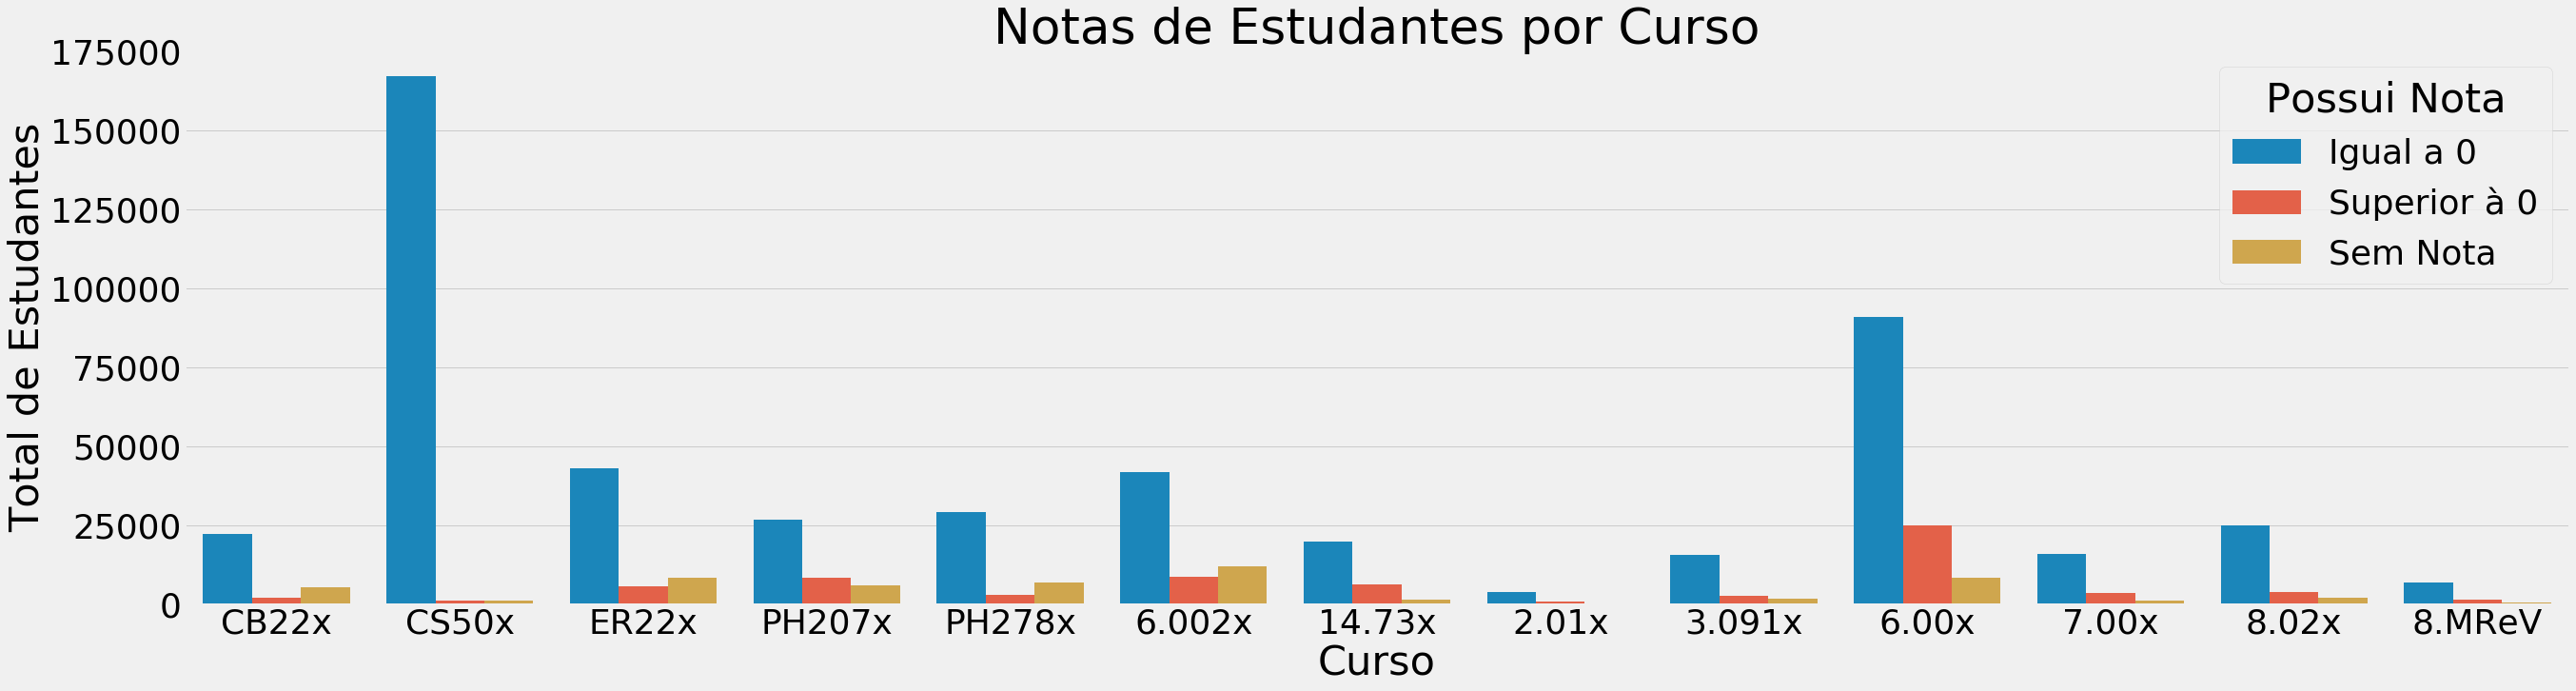

In [5]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (40, 10)

plt.rcParams.update({'font.size': 36})

course_df['course_code'] = course_df['course_id']
course_df['Possui Nota'] = course_df['grade'].map(lambda grade: 'Igual a 0' if grade == 0 else 'Superior à 0' if grade > 0 else 'Sem Nota')
sns.countplot(data=course_df, x='course_code', hue= 'Possui Nota')

#Definindo título
plt.title('Notas de Estudantes por Curso')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Total de Estudantes')
#Exibindo gráfico
plt.show()

**NOTAS:** A quantidade de estudantes com notas válidas (Diferente de NaN) é significativa, mas um grande número de notas é zero.
A quantidade de estudantes varia muito entre os cursos, mas o número com estudantes com notas maiores que zero varia menos. 

## Análise da Variável *Registered*
Avaliação de mínimo, máximo, média e moda da variável *Registered*.
**Descrição:** registered for course, =1 for all records in	personcourse.

In [6]:
course_df['registered'].value_counts()

1    641138
Name: registered, dtype: int64

**NOTAS:** Como esperado, todos os usuários da base estão registrados, essa variável pode ser removida.

## Análise da Variável *Viewed*
Avaliação de mínimo, máximo, média e moda da variável *Viewed*.

**Descrição:** administrative,	0/1;	anyone	who	accessed	the	‘Courseware’	tab	(the	home	of	the	videos,	problem	sets,	and	exams)	within	the	edX	platform	for	the	course.	 Note	that	there	exist	course	materials	outside	of	the	‘Courseware’	tab,	such	as	 the	Syllabus	or	the	Discussion	forums.

“administrative” indicates	that	the	variable comes	from	the	edX	system	or	has	been	computed	by	the	research	team;	


In [7]:
course_df['viewed'].value_counts()

1    400262
0    240876
Name: viewed, dtype: int64

In [8]:
course_df['viewed_text'] = course_df['viewed'].map(lambda v: 'Sim' if v else 'Não')

sns.countplot(data=course_df, x='viewed_text', hue= 'has_grade')

#Definindo título
plt.title('Resultados por Visualização do Área de Conteúdos.')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Visualizou Área de Conteúdos')
plt.ylabel('Notas')
#Exibindo gráfico

plt.show()

ValueError: Could not interpret input 'has_grade'

**NOTAS:** Cerca de 2/3 dos usuários acessaram a página de conteúdo do curso. Todos os usuários que não acessaram ficaram com ZERO io não tiveram nota atribuída.

In [ ]:
sns.countplot(data=course_df, x='course_code', hue= 'viewed_text')

#Definindo título
plt.title('Total de Alunos que Visualização a Área de Conteúdo por Curso')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Total')
#Exibindo gráfico
plt.show()

**NOTAS:** Visualizando por curso, observa-se que em quase todos os cursos (exceto PH278x) o número de estudantes que visualizou a área de contepudos é superior ao número de alunos que não visualizou, mas em diferentes proporções.

## Análise da Variável *Explored*
Avaliação de mínimo, máximo, média e moda da variável *explored*.

**Descrição:** 	anyone	who	accessed	at	least	half	of	the	chapters in	the	courseware (chapters	are	the	highest	level	on	the	“courseware” menu housing	course	content).


In [ ]:
course_df['explored'].value_counts()

**NOTAS:** Apenas 6,59% dos estudantes exploraram mais da metade dos conteúdos do curso.

In [ ]:
course_df['explored_text'] = course_df['explored'].map(lambda v: 'Sim' if v else 'Não')

sns.countplot(data=course_df, x='explored_text', hue= 'has_grade')

#Definindo título
plt.title('Resultados por Exploração de mais de 50% do conteúdo do curso.')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Exploração > 50%')
plt.ylabel('Notas')
#Exibindo gráfico

plt.show()

**NOTAS:** Apesar de terem explorado menos de 50% do curso, muitos alunos possuem notas superiores a ZERO.

In [ ]:
course_df['explored_text'] = course_df['explored'].map(lambda v: 'Sim' if v else 'Não')

explored_by_course = course_df[course_df['grade']>0]
sns.boxplot(data=explored_by_course, x='explored_text', y= 'grade')

#Definindo título
plt.title('Notas por Exploração de mais de 50% do conteúdo do curso.')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Exploração > 50%')
plt.ylabel('Notas')
#Exibindo gráfico

plt.show()

**Notas**: Embora os alunos com exploração inferior a 50% tenham obtido notas, o boxplot indica que são menores do que a dos estudantes que exploraram mais.

In [ ]:
sns.countplot(data=course_df, x='course_code', hue= 'explored_text')

#Definindo título
plt.title('Total de Alunos que Exploraram mais de 50% do Conteúdo por Curso')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Total')
#Exibindo gráfico
plt.show()

**Notas:** A quantidade de alunos que exploraram mais de 50% do conteúdo diverge significativamente em relação aos cursos.

## Análise da Variável *Certified*
Avaliação de mínimo, máximo, média e moda da variável *certified*.

**Descrição:** administrative,	0/1;	anyone	who earned	a	certificate.	Certificates	are	based on	course	grades,	and	depending	on	the	course,	the	cutoff	for	a	certificate	varies from	50%	- 80%.	

“administrative” indicates that the variable comes from the edX system or has been computed by the research team;

In [ ]:
course_df['certified'].value_counts()

**Notas:** Apenas 2,83% dos estudantes obtiveram certificado.

In [ ]:
course_df['certified_text'] = course_df['certified'].map(lambda v: 'Sim' if v else 'Não')

certified_by_course = course_df[course_df['grade']>0]
sns.boxplot(data=certified_by_course, x='certified_text', y= 'grade')

#Definindo título
plt.title('Notas por Obtenção da Ceritificação.')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Certificado')
plt.ylabel('Notas')
#Exibindo gráfico

plt.show()



**Notas:** os estudantes que obtiveram certificação possui notas em média superiores aos alunos que não possuem. Observe que a nota exigida para certificação varia de acordo com o curso, logo existem estuantes não certificantes com até 0.79 de nota final e estudantes com notas próximas a 5 com certificado.

In [ ]:
sns.countplot(data=course_df, x='course_code', hue= 'certified_text')

#Definindo título
plt.title('Total de Alunos que obtiveram certificado por Curso')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Total')
#Exibindo gráfico
plt.show()

**Notas:** A proporção de alunos sem certificado é muito inferior ao total de estudantes em todos os cursos.

## Análise da Variável *Região (final_cc_cname_DI)*
Avaliação de mínimo, máximo, média da variável *final_cc_cname_DI*.

**Descrição:** 	mix	of	administrative	(computed	from	IP address)	and	userprovided (filled	in	from	student	address	if	available	when	IP was	indeterminate);	during	de-identification,	some	country	names	were	replaced	with	the	 corresponding	continent/region	name.	Examples:	“Other	South	Asia”	or	“Russian Federation”.

“administrative” indicates that the variable comes from the edX system or has been computed by the research team;


In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)
course_df['final_cc_cname_DI'].value_counts(sort=True).plot.barh()

**Notas:** Há uma ampla disperção de estudantes em diferentes regiões.

In [ ]:
sns.countplot(data=course_df, x='has_grade', hue= 'final_cc_cname_DI')


#Definindo título
plt.title('Estudantes por Região')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Total de Estudantes')
#Exibindo gráfico
plt.show()


**Notas:** Em alto nível, as proporções entre as diferentes variáveis parecem se manter.

## Análise da Variável *Escolaridade (LoE_DI)*
Avaliação de mínimo, máximo, média da variável *LoE_DI*.

**Descrição:** LoE: user-provided, highest level of education completed. Possible values: “Less than Secondary,” “Secondary,” “Bachelor’s,” “Master’s,” and “Doctorate.”

In [ ]:

plt.rcParams['figure.figsize'] = (20, 5)
course_df['LoE_DI'].value_counts(sort=True).plot.barh()

**Notas:** A plataforma é utilizada predominantemente por estudantes que completaram graduação, ensino médio e mestrado. Os estudantes que completaram doutorado ou com escolaridade inferior ao ensino médio são minoria. 

In [ ]:
sns.countplot(data=course_df, x='course_code', hue= 'LoE_DI')

#Definindo título
plt.title('Total de Alunos Por Escolaridade por Curso')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Total')
#Exibindo gráfico
plt.show()

**Notas:** A distribuição de estudantes com diferentes níveis de escolaridade não apresenta muita variação entre os cursos.

In [ ]:
certified_by_course = course_df[course_df['grade']>0]
sns.boxplot(data=certified_by_course, x='LoE_DI', y= 'grade')

#Definindo título
plt.title('Notas por Escolaridade')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Escolaridade')
plt.ylabel('Notas')
#Exibindo gráfico

plt.show()

**Notas:** Existe variação entre os resultados obtidos por diferentes níveis de escolaridade, porém com grande variação.

## Análise da Variável *Ano de Nascimento (YoB)*
Avaliação de mínimo, máximo, média da variável *YoB*.

**Descrição:** user-provided, year of birth. Example: “1980”.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)

ranges = [1940,1950,1960,1970,1980,1990,2000]
course_df.groupby(pd.cut(course_df['YoB'], ranges)).count()['userid_DI'].plot.barh()

**Notas:** A maior parte dos estudantes nasceram a partir da década de 80.

In [ ]:
course_df['decade'] = pd.cut(course_df['YoB'], ranges)
certified_by_course = course_df[course_df['grade']>0]


sns.boxplot(data=certified_by_course, x='decade', y= 'grade')

#Definindo título
plt.title('Notas por Ano Nascimento')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Ano nascimento')
plt.ylabel('Notas')
#Exibindo gráfico

plt.show()

**Notas:** Embora haja muita variação, é possível observar notas melhores nos alunos nascidos a partir da década de 70 e uma menor varuação dos resultados nas extremidades.

## Análise da Variável *Gênero (gender)*
Avaliação de mínimo, máximo, média da variável *Gênero*.

**Descrição:** user-provided. Possible values: m (male), f (female) and o (other).

In [ ]:
plt.rcParams['figure.figsize'] = (20, 3)
course_df['gender'].value_counts(sort=True).plot.barh()

**Notas:** Há uma predominância de estudantes do sexo masculino na base como um todo.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)

sns.countplot(data=course_df, x='course_code', hue= 'gender')

#Definindo título
plt.title('Alunos Por Sexo em Cada Curso')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Quantidade')
#Exibindo gráfico
plt.show()

**Notas:** Embora alguns na amostra como um todo haja uma grande predominância masculina, dento dos cursos essa maioria ocorre em diferentes proporções.

In [ ]:
grade_by_gender = course_df[course_df['grade']>0]

sns.boxplot(data=grade_by_gender, x='gender', y= 'grade')
#Definindo título
plt.title('Notas por Gênero')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Gênero')
plt.ylabel('Nota')
#Exibindo gráfico

plt.show()

**Notas:** Embora os estudantes de gênero masculino seham maioria, as notas dos mesmos variam menos e possuem média menor que as de gênero feminino.

## Análise da Variável *Interações (nevents)*
Avaliação de mínimo, máximo, média da variável *nevents*.

**Descrição:** administrative, number of interactions with the course, recorded in the tracking logs; blank if no interactions beyond registration. Example: “502”.

“administrative” indicates that the variable comes from the edX system or has been computed by the research team;

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
ranges = [0,1, 10, 100,1000,10000,100000,1000000]
course_df.groupby(pd.cut(course_df['nevents'], ranges)).count()['userid_DI'].plot.barh()
#course_df['nevents'].value_counts(sort=True).plot.barh()

**Notas:** O número de interações dos estudantes varia entre 1 e 100, mas ainda existem muitos estudantes entre 100 e 1000 interações.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
grade_by_events = course_df[course_df['grade']>0]

# marker: matplotlib marker code (Marker to use for the scatterplot glyphs)
# x_bins: Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. 
#         This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. 
#         This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions 
#         of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.
g = sns.regplot(x="nevents", y="grade", data=grade_by_events, marker="+", x_bins=1000)


#Definindo título
plt.title('Notas por Número de Interações')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Total de Interações')
plt.ylabel('Nota')
#g.set(ylim=(0, 1))
#Exibindo gráfico

plt.show()

**Notas:** Pela regressão linear, alunos com mais interações tendem a possui notas maiores.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)

course_df['nevents_interval'] = pd.cut(course_df['nevents'], ranges)

sns.countplot(data=course_df, x='course_code', hue= 'nevents_interval')

#Definindo título
plt.title('Número de Interações por Curso.')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Número Interações')
#Exibindo gráfico
plt.show()

**Notas:** O número de interações varia pouco em relação ao curso.

## Análise da Variável *Dias de Interação (ndays_act)*

Avaliação de mínimo, máximo, média da variável *ndays_act*.

**Descrição:** administrative, number of unique days student interacted with course. Example: “16”.

“administrative” indicates that the variable comes from the edX system or has been computed by the research team;

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
course_df['ndays_act'].describe()
ranges = [0,25, 50, 75, 100, 125, 150, 175, 200, 225]
course_df.groupby(pd.cut(course_df['ndays_act'], ranges)).count()['userid_DI'].plot.barh()


**Notas:** A maior parte dos usuários interagiu com o curso menos de 25 dias. 

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
grade_by_events = course_df[course_df['grade']>0]

# marker: matplotlib marker code (Marker to use for the scatterplot glyphs)
# x_bins: Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. 
#         This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. 
#         This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions 
#         of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.
sns.regplot(x="ndays_act", y="grade", data=grade_by_events, marker="+", x_bins=1000)


#Definindo título
plt.title('Notas por Número de Dias de Interação')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Número de Dias de Interação')
plt.ylabel('Nota')
#Exibindo gráfico

plt.show()

**Notas:** Pela regressão linear, alunos com mais interações tendem a possui notas maiores.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)

course_df['ndays_act_interval'] = pd.cut(course_df['ndays_act'], ranges)

sns.countplot(data=course_df, x='course_code', hue= 'ndays_act_interval')

#Definindo título
plt.title('Dias de interação por Curso.')
    #Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Dias de Interações')
#Exibindo gráfico
plt.show()

**Notas:** É possívevel observar que predominantemente os estudanes interagem menos de 25 dias na plataforma, como pouca variação entre os cursos.

## Análise da Variável *Exibição de Vídeos (nplay_video)*

Avaliação de mínimo, máximo, média da variável *nplay_video*.

**Descrição:** nplay_video:	administrative,	number	of	play	video	events within	the	course. Example:	“52”.

“administrative” indicates that the variable comes from the edX system or has been computed by the research team;

In [9]:
plt.rcParams['figure.figsize'] = (20, 5)
course_df['nplay_video'].describe()

count    183608.000000
mean        114.844173
std         426.996844
min           1.000000
25%           5.000000
50%          18.000000
75%          73.000000
max       98517.000000
Name: nplay_video, dtype: float64

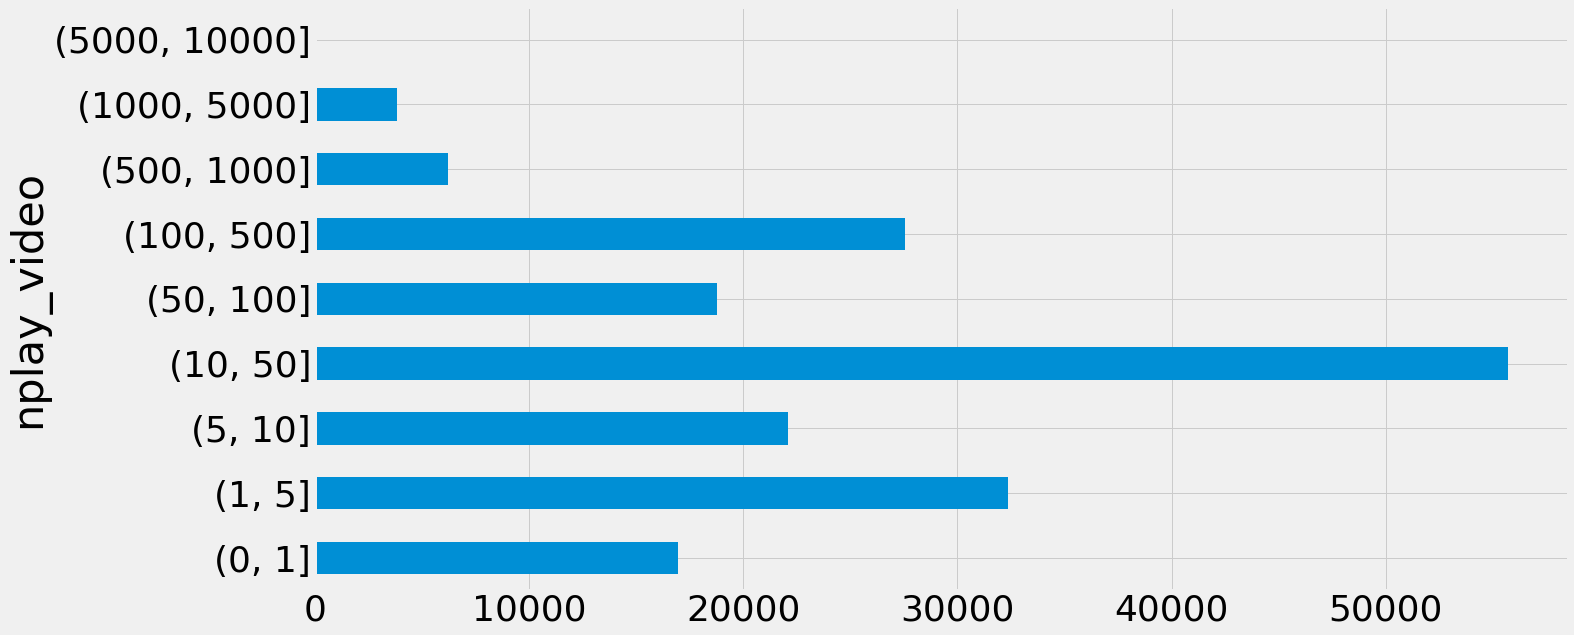

In [10]:
plt.rcParams['figure.figsize'] = (20, 10)
ranges = [0, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
course_df.groupby(pd.cut(course_df['nplay_video'], ranges)).count()['userid_DI'].plot.barh()
#course_df['nevents'].value_counts(sort=True).plot.barh()

**Notas:** A maior parte dos estudantes possui entre 1 e 50 exibição de vídeos, com um número proporcionalmente baixo de usuários com mais de 500 vídeos exibidos.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
grade_by_events = course_df[course_df['grade']>0]

# marker: matplotlib marker code (Marker to use for the scatterplot glyphs)
# x_bins: Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. 
#         This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. 
#         This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions 
#         of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.
sns.regplot(x="nplay_video", y="grade", data=grade_by_events, marker="+", x_bins=1000)


#Definindo título
plt.title('Notas por Vídeos Exibidos')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Exibição de Vídeos ')
plt.ylabel('Nota')
#Exibindo gráfico

plt.show()

**Notas:** Pela Regressão Linear o número de exibição de vídeos tendem a possui maior nota.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)

ranges = [0, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
course_df['nplay_video_interval'] = pd.cut(course_df['nplay_video'], ranges)

sns.countplot(data=course_df, x='course_code', hue= 'nplay_video_interval')

#Definindo título
plt.title('Exibição de Vídeos por Curso.')
    #Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Total por Exibição de Vídeos')
#Exibindo gráfico
plt.show()

**Notas**: O número de exibição de vídeos possui bastante variabilidade em relação aos cursos.

## Análise da Variável *Visualização de Capítulos (nchapters)*

Avaliação de mínimo, máximo, média da variável *nchapters*.

**Descrição:** administrative,	number	of	chapters	(within	the	Courseware)	with	which	the	student	interacted. Example:	“12”.

“administrative” indicates that the variable comes from the edX system or has been computed by the research team;

In [ ]:
course_df['nchapters'].describe()

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
ranges = [0, 10, 20, 30, 40]
course_df.groupby(pd.cut(course_df['nchapters'], ranges)).count()['userid_DI'].plot.barh()
#course_df['nevents'].value_counts(sort=True).plot.barh()

**Notas:** A maior parte dos estudante visualizou capítulos de 1 a 10 vezes.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
grade_by_events = course_df[course_df['grade']>0]

# marker: matplotlib marker code (Marker to use for the scatterplot glyphs)
# x_bins: Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. 
#         This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. 
#         This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions 
#         of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.
sns.regplot(x="nchapters", y="grade", data=grade_by_events, marker="+", x_bins=1000)


#Definindo título
plt.title('Notas por Capítulos Visualizados')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel(' Capítulos Visualizados ')
plt.ylabel('Nota')
#Exibindo gráfico

plt.show()

**Notas:** De 1 a 20 capítulos visualizados, a Regressão Linear indica que quanto mais capítulos visualizados maior a nota. A partir de 20 não há um comportamento linear.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
ranges = [0, 10, 20, 30, 40]

course_df['nchapters_interval'] = pd.cut(course_df['nchapters'], ranges)

sns.countplot(data=course_df, x='course_code', hue= 'nchapters_interval')

#Definindo título
plt.title('Número de Capítulos Visualizados por Curso.')
    #Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Total por Número de Capítulos Visualizado')
#Exibindo gráfico
plt.show()

**Notas:** Embora o número de visualização de capítulos entre 0 e 10 predomine, há diferença no padrão de exibição de capítulos entre os cursos.

## Análise da Variável *Número de Postagens em Fóruns (nforum_posts)*

Avaliação de mínimo, máximo, média da variável *nforum_posts*.

**Descrição:** administrative, number of posts to the Discussion Forum. Example: “8”.
        
“administrative” indicates that the variable comes from the edX system or has been computed by the research team;

In [ ]:
course_df['nforum_posts'].describe()

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
ranges = [0, 5, 10, 15, 20]
course_df.groupby(pd.cut(course_df['nforum_posts'], ranges)).count()['userid_DI'].plot.barh()
#course_df['nevents'].value_counts(sort=True).plot.barh()

**Notas:** A maior parte dos estudante visualizou capítulos de 1 a 5 vezes.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
nforum_posts_by_events = course_df[course_df['grade']>0]

# marker: matplotlib marker code (Marker to use for the scatterplot glyphs)
# x_bins: Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. 
#         This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. 
#         This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions 
#         of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.
sns.regplot(x="nforum_posts", y="grade", data=nforum_posts_by_events, marker="+", x_bins=1000)


#Definindo título
plt.title('Notas por Postagem em Fórum')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Postagem em Fórum')
plt.ylabel('Nota')
#Exibindo gráfico

plt.show()

**Notas:** A Regressão Linear indica que quanto mais posts em Fóruns maior a nota.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
ranges = [0, 5, 10, 15, 20]

course_df['nforum_posts_interval'] = pd.cut(course_df['nforum_posts'], ranges)

sns.countplot(data=course_df, x='course_code', hue= 'nforum_posts_interval')

#Definindo título
plt.title('Postagem em Fórum por Curso.')
    #Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Total por Quantidade de Postagem em Fórum')
#Exibindo gráfico
plt.show()

**Notas:** Postagens de Fórum entre 1 e 5 são predominantes em todos os cursos, porém há padrões diferentes entre os cursos.

## Análise da Variável *Inconsistente (incomplete_flag)*

Avaliação da variável *incomplete_flag*.

**Descrição:** administrative, identifies records that are internally inconsistent. Due to a variety of data issues, including missing tracking logs and one course (CS50x) which has virtually no logs because most of the course content is hosted outside of the edX platform, a portion of the records have null values for nevents but have non-null values for ndays_act, nforum_posts, or nchapters. The source for nevents and for last_event_DI is the tracking logs, whereas ndays_act, nforum_posts, and nchapters come from a data source known as the “Courseware Student Module”1. Due to the two different sources, if something is wrong with the Tracking Logs2 for a class or a student, then records in Person Course can be internally inconsistent and have a value of ‘1’ in this column.
        
“administrative” indicates that the variable comes from the edX system or has been computed by the research team;

In [ ]:
#course_df['incomplete_flag'].describe()
course_df.shape


**Notas:** Existem 100161 estudantes com dados imcompletos, o que corresponde a 15% do total.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
ranges = [0, 5, 10, 15, 20]

sns.countplot(data=course_df, x='course_code', hue= 'incomplete_flag')

#Definindo título
plt.title('Imcompletos por Curso.')
    #Definindo o texto que ficará no eixo X e Y
plt.xlabel('Curso')
plt.ylabel('Total de Imcompletos')
#Exibindo gráfico
plt.show()

**Notas:** O curso CS50x possui TODOS os estudantes com dados incompletos, e quase todos os cursos possuem alguma proporção de estudantes incompletos.

## Consolidados

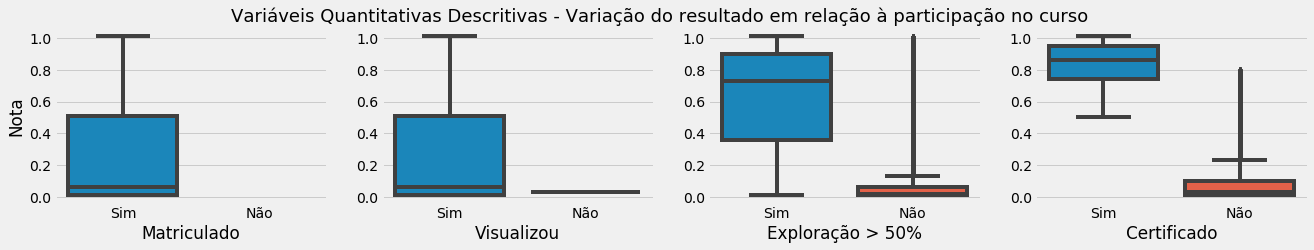

In [11]:
plt.rcParams.update({'font.size': 14})

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 3)


fig = plt.figure()
fig.suptitle("Variáveis Quantitativas Descritivas - Variação do resultado em relação à participação no curso", fontsize=18)
    



plt.subplot(1,4,1)

course_df['registered_text'] = course_df['registered'].map(lambda v: 'Sim' if v else 'Não')
course_df.sort_values(by=['registered_text'])
selection = course_df[course_df['grade'] > 0]
sns.boxplot(data=selection,x='registered_text', y='grade', order=["Sim", "Não"])

#Definindo título
plt.title('')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Matriculado')
plt.ylabel('Nota')
#Exibindo gráfico


plt.subplot(1,4,2)

course_df['viewed_text'] = course_df['viewed'].map(lambda v: 'Sim' if v else 'Não')
viewd = course_df[course_df['grade'] > 0]
viewd.sort_values(by=['viewed_text'])
sns.boxplot(data=viewd, x='viewed_text', y= 'grade', order=["Sim", "Não"])

#Definindo título
plt.title('')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Visualizou')
plt.ylabel('')
#Exibindo gráfico

plt.subplot(1,4,3)


course_df['explored_text'] = course_df['explored'].map(lambda v: 'Sim' if v else 'Não')

explored_by_course = course_df[course_df['grade']>0]
explored_by_course.sort_values(by=['explored_text'])
sns.boxplot(data=explored_by_course, x='explored_text', y= 'grade', order=["Sim", "Não"])

#Definindo título
plt.title('')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Exploração > 50%')
plt.ylabel('')
#Exibindo gráfico
plt.subplot(1,4,4)

course_df['certified_text'] = course_df['certified'].map(lambda v: 'Sim' if v else 'Não')

certified_by_course = course_df[course_df['grade']>0]
certified_by_course.sort_values(by=['certified_text'])
sns.boxplot(data=certified_by_course, x='certified_text', y= 'grade', order=["Sim", "Não"])

#Definindo título
plt.title('')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Certificado')
plt.ylabel('')
#Exibindo gráfico

plt.show()

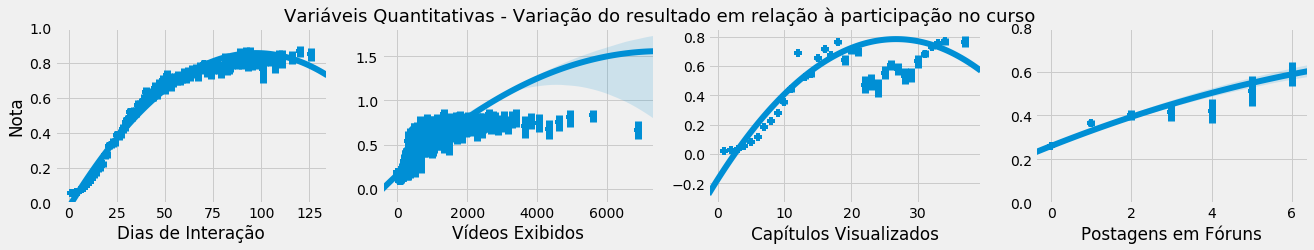

In [25]:
plt.rcParams.update({'font.size': 14})


fig = plt.figure()
fig.suptitle("Variáveis Quantitativas - Variação do resultado em relação à participação no curso", fontsize=18)


plt.subplot(1,4,1)
plt.rcParams['figure.figsize'] = (20, 3)


grade_by_events = course_df[course_df['grade']>0]

# marker: matplotlib marker code (Marker to use for the scatterplot glyphs)
# x_bins: Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. 
#         This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. 
#         This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions 
#         of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.
g = sns.regplot(x="ndays_act", y="grade", data=grade_by_events, marker="+", x_bins=1000, order=2)
g.set(ylim=(0, 1))

#Definindo título
plt.title('')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Dias de Interação')
plt.ylabel('Nota')
#Exibindo gráfico

plt.subplot(1,4,2)

grade_by_events = course_df[course_df['grade']>0]

# marker: matplotlib marker code (Marker to use for the scatterplot glyphs)
# x_bins: Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. 
#         This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. 
#         This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions 
#         of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.
g = sns.regplot(x="nplay_video", y="grade", data=grade_by_events, marker="+", x_bins=2000, order=2)
#g.set(ylim=(0, 1))

#Definindo título
plt.title('')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Vídeos Exibidos')
plt.ylabel('')
#Exibindo gráfico

plt.subplot(1,4,3)

grade_by_events = course_df[course_df['grade']>0]

# marker: matplotlib marker code (Marker to use for the scatterplot glyphs)
# x_bins: Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. 
#         This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. 
#         This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions 
#         of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.
g =sns.regplot(x="nchapters", y="grade", data=grade_by_events, marker="+", x_bins=1000, order=2)
#g.set(ylim=(0, 1))

#Definindo título
plt.title('')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Capítulos Visualizados')
plt.ylabel('')
#Exibindo gráfico


plt.subplot(1,4,4)

nforum_posts_by_events = course_df[course_df['grade']>0]

# marker: matplotlib marker code (Marker to use for the scatterplot glyphs)
# x_bins: Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. 
#         This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. 
#         This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions 
#         of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.
g = sns.regplot(x="nforum_posts", y="grade", data=nforum_posts_by_events, marker="+", x_bins=1000, order=2)
g.set(ylim=(0, 0.8))


#Definindo título
plt.title('')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Postagens em Fóruns')
plt.ylabel('')
#Exibindo gráfico

plt.show()